In [3]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

In [53]:
data = ndimage.imread('data-behind-everything.jpg')


    

## Step 4

In [66]:
def convert_to_grayscale(image, crop_left, crop_top, crop_right, crop_bottom, contrast_scale):
    cropped_image = crop(image, crop_top, crop_bottom, crop_left, crop_right)
    gray_image = gray(cropped_image)
    contrast_image = get_contrast(gray_image, contrast_scale)
    return contrast_image
    
    
    

def crop(image, top, bottom, left, right):
    return image[top:-bottom, left:-right, :]

def gray(image):
    return image.mean(axis=2)

def get_contrast(image, scale):
    med = np.median(image)

    vscale = np.vectorize(scaler)
    return vscale(image,med, scale)
    
def scaler(x,med, scale):
    if x>med:
        return int(np.max([x+ x*scale,255]))
    elif x<med:
        return int(np.min([x- x*scale,0]))
    else:
        return x
        
    

In [68]:
gray_data = convert_to_grayscale(data, 10, 50, 10, 50, 0.3)

In [71]:
gray_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

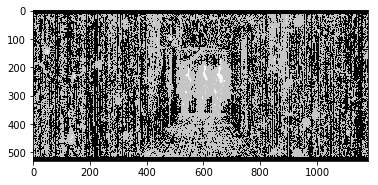

In [72]:
plt.imshow(gray_data, cmap=plt.cm.gray)